# PyTorch 基础数据操作笔记

## 数据基础

1. arange（创建连续序列张量）

* 语法：torch.arange(start=0, end, step=1, dtype=None, device=None)
* 核心：生成左闭右开区间 [start, end) 的连续整数 / 浮点数序列
* 注意：end 是必填项，start 默认 0，step 默认 1，dtype 默认 None，device 默认 None

In [3]:
import torch

# 基础用法：生成0到9的序列（步长1）
t1 = torch.arange(10)
print("arange(10)结果：", t1)

# 指定起始值和步长：生成1到10，步长2
t2 = torch.arange(1, 11, 2)
print("arange(1,11,2)结果：", t2)

# 指定数据类型和设备
t3 = torch.arange(5, dtype=torch.float32, device="cpu")
print("arange(5, dtype=float32)结果：", t3)

arange(10)结果： tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arange(1,11,2)结果： tensor([1, 3, 5, 7, 9])
arange(5, dtype=float32)结果： tensor([0., 1., 2., 3., 4.])


2. shape（获取张量形状）

* 语法：张量.shape 或 张量.size()（两者等价）
* 核心：返回 torch.Size 对象，显示张量各维度的元素数量
* 常用场景：查看张量维度、判断是否需要 reshape

In [4]:
# 创建2行3列的张量
t = torch.ones(2, 3)

# 获取形状
print("张量shape：", t.shape)
print("张量size()：", t.size())

# 提取单个维度的大小
print("第0维大小：", t.shape[0])
print("第1维大小：", t.shape[1])

张量shape： torch.Size([2, 3])
张量size()： torch.Size([2, 3])
第0维大小： 2
第1维大小： 3


3. reshape（重塑张量形状）

* 语法：张量.reshape(新形状) 或 张量.view(新形状)（view 仅支持连续张量）
* 核心：不改变数据，仅调整维度排列，新形状的元素总数需与原张量一致
* 常用技巧：用 - 1 自动计算某一维度（如 reshape (3, -1) 表示 3 行，列数自动算）

In [5]:
# 创建1维张量（6个元素）
t = torch.arange(6)
print("原始张量：", t)
print("原始shape：", t.shape)

# 重塑为2行3列
t_23 = t.reshape(2, 3)
print("reshape(2,3)结果：\n", t_23)

# 用-1自动计算维度（3行，列数=6/3=2）
t_3x = t.reshape(3, -1)
print("reshape(3,-1)结果：\n", t_3x)

# 重塑为3维张量（1×2×3）
t_3d = t.reshape(1, 2, 3)
print("3维张量shape：", t_3d.shape)

原始张量： tensor([0, 1, 2, 3, 4, 5])
原始shape： torch.Size([6])
reshape(2,3)结果：
 tensor([[0, 1, 2],
        [3, 4, 5]])
reshape(3,-1)结果：
 tensor([[0, 1],
        [2, 3],
        [4, 5]])
3维张量shape： torch.Size([1, 2, 3])


4. zeros（创建全 0 张量）

* 语法：torch.zeros(形状, dtype=None, device=None)
* 核心：生成指定形状的全 0 张量，常用来初始化占位张量
* 补充：zeros_like(张量) 生成与输入张量形状相同的全 0 张量

In [6]:
# 创建3行4列的全0张量
t1 = torch.zeros(3, 4)
print("zeros(3,4)结果：\n", t1)

# 指定数据类型（int64）
t2 = torch.zeros(2, 2, dtype=torch.int64)
print("zeros(2,2, dtype=int64)结果：\n", t2)

# zeros_like：基于已有张量创建相同形状的全0张量
t3 = torch.ones(2, 5)
t4 = torch.zeros_like(t3)
print("zeros_like结果shape：", t4.shape)

zeros(3,4)结果：
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
zeros(2,2, dtype=int64)结果：
 tensor([[0, 0],
        [0, 0]])
zeros_like结果shape： torch.Size([2, 5])


5. Python 列表赋值（列表转张量 / 张量赋值）

* 列表转张量：torch.tensor(列表)，直接将 Python 列表转换为张量
* 张量赋值：支持将列表 / 张量的值赋给另一个张量的切片（需维度匹配）
* 注意：torch.tensor() 是创建新张量，torch.as_tensor() 共享列表内存

In [10]:
# 1. Python列表转张量
lst = [[1, 2, 3], [4, 5, 6]]
t1 = torch.tensor(lst)
print("列表转张量结果：\n", t1)

# 2. 给张量切片赋值（列表→张量）
t2 = torch.zeros(2, 3)
t2[0, :] = torch.tensor([10, 20, 30], dtype=torch.float32)   # 给第0行赋值
t2[1, 1] = 50            # 给第1行第1列赋值
print("赋值后的张量：\n", t2)

# 3. 共享内存的转换（as_tensor）
lst2 = [7, 8, 9]
t3 = torch.as_tensor(lst2)
lst2[0] = 77  # 修改原列表，张量也会变
print("共享内存的张量：", t3)

列表转张量结果：
 tensor([[1, 2, 3],
        [4, 5, 6]])
赋值后的张量：
 tensor([[10., 20., 30.],
        [ 0., 50.,  0.]])
共享内存的张量： tensor([7, 8, 9])


6. 标准算数运算（元素级）

* 支持运算符：+ - * / **（加减乘除、幂运算），均为元素级运算
* 等价函数：torch.add()/sub()/mul()/div()，功能与运算符一致
* 要求：两个张量形状相同，或满足广播机制

In [11]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# 加法
add1 = a + b
add2 = torch.add(a, b)
print("加法结果：\n", add1)

# 减法
sub = a - b
print("减法结果：\n", sub)

# 乘法（元素级，非矩阵乘法）
mul = a * b
print("元素乘结果：\n", mul)

# 除法
div = b / a
print("除法结果：\n", div)

# 幂运算
pow = a ** 2  # 每个元素平方
print("平方结果：\n", pow)

# 标量与张量运算（自动广播）
scalar_add = a + 10  # 所有元素加10
print("标量加法：\n", scalar_add)

加法结果：
 tensor([[ 6,  8],
        [10, 12]])
减法结果：
 tensor([[-4, -4],
        [-4, -4]])
元素乘结果：
 tensor([[ 5, 12],
        [21, 32]])
除法结果：
 tensor([[5.0000, 3.0000],
        [2.3333, 2.0000]])
平方结果：
 tensor([[ 1,  4],
        [ 9, 16]])
标量加法：
 tensor([[11, 12],
        [13, 14]])


7. 多个张量按行 / 列联结

* 核心函数：torch.cat(张量列表, dim=维度)
* 按行联结：dim=0（增加行数，列数不变）
* 按列联结：dim=1（增加列数，行数不变）
* 注意：除联结维度外，其他维度必须相同

In [13]:
# 创建两个2行2列的张量
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# 按行联结（dim=0）→ 4行2列
cat_row = torch.cat([a, b], dim=0)
print("按行联结结果：\n", cat_row)

# 按列联结（dim=1）→ 2行4列
cat_col = torch.cat([a, b], dim=1)
print("按列联结结果：\n", cat_col)

# 3个张量联结（同理）
c = torch.tensor([[9, 10], [11, 12]])
cat_3 = torch.cat([a, b, c], dim=0)
print("3张量按行联结shape：", cat_3, "shape：", cat_3.shape)

按行联结结果：
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
按列联结结果：
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
3张量按行联结shape： tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]]) shape： torch.Size([6, 2])


8. 逻辑运算符（生成二元张量）

* 常用逻辑运算：> < >= <= == !=，返回布尔型张量（True/False）
* 核心：基于条件判断生成二元张量，常用于筛选元素
* 补充：torch.all() 判断所有元素是否满足条件，torch.any() 判断是否有元素满足

In [14]:
t = torch.tensor([[1, 5, 3], [4, 2, 6]])

# 大于3的元素 → 布尔张量
gt = t > 3
print("t > 3 结果：\n", gt)

# 等于2的元素
eq = t == 2
print("t == 2 结果：\n", eq)

# 小于等于5的元素
le = t <= 5
print("t <= 5 结果：\n", le)

# 全局判断：是否所有元素都大于0
all_gt0 = torch.all(t > 0)
print("所有元素>0？", all_gt0)

# 全局判断：是否有元素等于6
any_eq6 = torch.any(t == 6)
print("有元素=6？", any_eq6)

t > 3 结果：
 tensor([[False,  True, False],
        [ True, False,  True]])
t == 2 结果：
 tensor([[False, False, False],
        [False,  True, False]])
t <= 5 结果：
 tensor([[ True,  True,  True],
        [ True,  True, False]])
所有元素>0？ tensor(True)
有元素=6？ tensor(True)


9. 元素求和

* 语法：张量.sum(dim=None, keepdim=False)
* 核心参数：
* dim：指定求和维度（可传单个维度 / 多个维度，不传则对所有元素求和）
* keepdim：是否保持原维度数（True = 维度数不变，仅求和维度大小为 1；False = 合并求和维度）
* 关键规则：
* 单维度求和：合并指定维度，其他维度保留；
* 多维度求和：同时合并多个维度，剩余维度保留；
* 标量求和：不传 dim 时，所有元素求和返回标量。

In [18]:
# 2维张量求和示例

t_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("原始2维张量：\n", t_2d)
print("原始shape：", t_2d.shape)

# 1. 所有元素求和（标量，无维度）
sum_all = t_2d.sum()
print("所有元素求和：", sum_all)

# 2. 单维度求和（dim=0/列求和）→ 合并行，保留列维度
sum_dim0 = t_2d.sum(dim=0)
print("按列求和（dim=0）：", sum_dim0)
print("按列求和shape：", sum_dim0.shape)

# 3. 单维度求和（dim=1/行求和）→ 合并列，保留行维度
sum_dim1 = t_2d.sum(dim=1)
print("按行求和（dim=1，不保持维度）：", sum_dim1)
print("按行求和shape：", sum_dim1.shape)

# 4. 单维度求和 + keepdim=True（保持维度数）
sum_dim1_keep = t_2d.sum(dim=1, keepdim=True)
print("按行求和（保持维度）：\n", sum_dim1_keep)
print("保持维度shape：", sum_dim1_keep.shape)

原始2维张量：
 tensor([[1, 2, 3],
        [4, 5, 6]])
原始shape： torch.Size([2, 3])
所有元素求和： tensor(21)
按列求和（dim=0）： tensor([5, 7, 9])
按列求和shape： torch.Size([3])
按行求和（dim=1，不保持维度）： tensor([ 6, 15])
按行求和shape： torch.Size([2])
按行求和（保持维度）：
 tensor([[ 6],
        [15]])
保持维度shape： torch.Size([2, 1])


In [19]:
#3维张量求和示例

t_3d = torch.randint(1, 10, (2, 3, 5))  # 2×3×5的随机整数张量
print("\n原始3维张量：\n", t_3d)
print("原始3维shape：", t_3d.shape)

# 1. 多维度求和（dim=[0,2] → 合并第0、2维，保留第1维）
sum_dim02 = t_3d.sum(dim=[0, 2])
print("按dim=[0,2]求和结果：", sum_dim02)
print("求和后shape：", sum_dim02.shape)  # 原[2,3,5] → 合并2和5，剩余3 → shape=(3,)

# 2. 多维度求和 + keepdim=True（保持维度数）
sum_dim02_keep = t_3d.sum(dim=[0, 2], keepdim=True)
print("按dim=[0,2]求和（保持维度）：\n", sum_dim02_keep)
print("保持维度shape：", sum_dim02_keep.shape)  # shape=(1,3,1)

# 3. 单维度求和（dim=1 → 合并第1维，保留0和2维）
sum_dim1_3d = t_3d.sum(dim=1)
print("3维张量按dim=1求和：\n", sum_dim1_3d)
print("求和后shape：", sum_dim1_3d.shape)  # 原[2,3,5] → 合并3，剩余[2,5]

# ===================== 扩展示例3：4维张量（2×2×3×4） =====================
t_4d = torch.ones((2, 2, 3, 4))
print("\n原始4维张量shape：", t_4d.shape)

# 多维度求和（dim=[1,3] → 合并第1、3维）
sum_dim13 = t_4d.sum(dim=[1, 3])
print("4维张量按dim=[1,3]求和shape：", sum_dim13.shape)  # 原[2,2,3,4] → 合并2和4，剩余[2,3]


原始3维张量：
 tensor([[[8, 7, 6, 8, 7],
         [5, 3, 2, 1, 1],
         [9, 1, 3, 2, 2]],

        [[5, 6, 9, 4, 6],
         [8, 8, 8, 7, 7],
         [3, 3, 4, 3, 5]]])
原始3维shape： torch.Size([2, 3, 5])
按dim=[0,2]求和结果： tensor([66, 50, 35])
求和后shape： torch.Size([3])
按dim=[0,2]求和（保持维度）：
 tensor([[[66],
         [50],
         [35]]])
保持维度shape： torch.Size([1, 3, 1])
3维张量按dim=1求和：
 tensor([[22, 11, 11, 11, 10],
        [16, 17, 21, 14, 18]])
求和后shape： torch.Size([2, 5])

原始4维张量shape： torch.Size([2, 2, 3, 4])
4维张量按dim=[1,3]求和shape： torch.Size([2, 3])


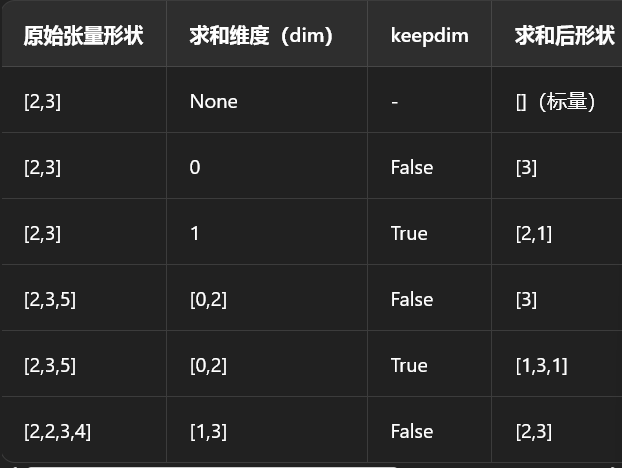

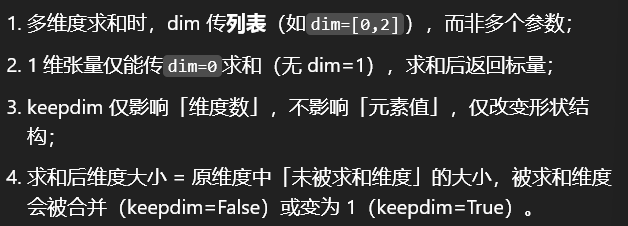

10. 广播机制

核心规则：
* 维度少的张量自动补前导维度（如 (3,) → (1,3)）；
* 某一维度大小为 1 时，自动扩展至匹配另一张量的对应维度；
* 作用：不同形状张量可直接运算，无需手动扩展，节省内存
* 示例：(2,3) 与 (3,) 运算 → (2,3) 与 (1,3) 广播 → (2,3) 与 (2,3) 运算

In [15]:
# 示例1：标量与张量（广播至所有元素）
a = torch.tensor([[1, 2], [3, 4]])
b = 10
broad1 = a + b
print("标量广播加法：\n", broad1)

# 示例2：1维张量与2维张量（(2,) → (1,2) → 广播为(3,2)）
c = torch.tensor([[1], [2], [3]])  # 3行1列
d = torch.tensor([10, 20])         # 1维（2个元素）
broad2 = c + d
print("维度广播加法：\n", broad2)

# 示例3：维度大小为1的广播
e = torch.tensor([[1, 2], [3, 4]])  # 2×2
f = torch.tensor([[5], [6]])        # 2×1
broad3 = e * f
print("维度1广播乘法：\n", broad3)

标量广播加法：
 tensor([[11, 12],
        [13, 14]])
维度广播加法：
 tensor([[11, 21],
        [12, 22],
        [13, 23]])
维度1广播乘法：
 tensor([[ 5, 10],
        [18, 24]])


11. 元素选择（索引 / 切片 / 掩码）

* 基础索引：张量[行, 列]，支持整数索引、切片（:）、省略号（...）
* 高级索引：布尔掩码（张量[掩码]）、整数列表索引
* 核心：精准筛选或修改张量的指定元素

In [16]:
t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 1. 基础索引：取单个元素（第1行第2列，索引从0开始）
elem = t[1, 2]
print("t[1,2] =", elem)

# 2. 切片：取第0行所有列
row0 = t[0, :]
print("第0行：", row0)

# 3. 切片：取前2行，后2列
slice_part = t[:2, 1:]
print("前2行后2列：\n", slice_part)

# 4. 布尔掩码选择：筛选大于5的元素
mask = t > 5
selected = t[mask]
print("大于5的元素：", selected)

# 5. 整数列表索引：取第0行和第2行，第1列
idx_select = t[[0, 2], 1]
print("指定行的第1列：", idx_select)

# 6. 省略号：取所有行的第2列
ellipsis_select = t[..., 2]
print("所有行的第2列：", ellipsis_select)

t[1,2] = tensor(6)
第0行： tensor([1, 2, 3])
前2行后2列：
 tensor([[2, 3],
        [5, 6]])
大于5的元素： tensor([6, 7, 8, 9])
指定行的第1列： tensor([2, 8])
所有行的第2列： tensor([3, 6, 9])


12. rand（0-1 均匀分布随机张量）

In [17]:
# 创建3行2列随机张量（0-1）
t = torch.rand(3, 2)
print("rand(3,2)：\n", t)

rand(3,2)：
 tensor([[0.1353, 0.8371],
        [0.4136, 0.3864],
        [0.7264, 0.3017]])


## 线性代数

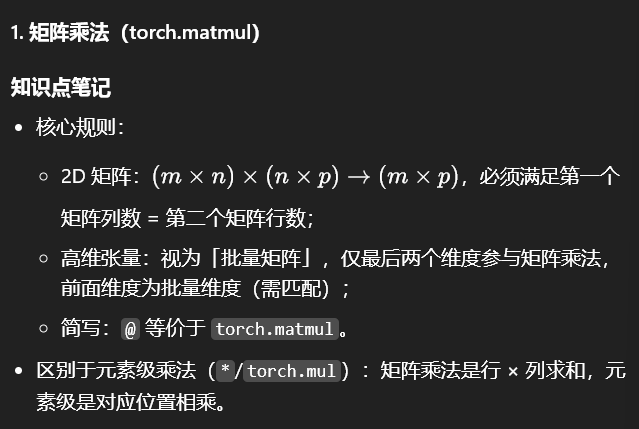

In [20]:
import torch

# 2D矩阵乘法（基础）
A = torch.tensor([[1, 2], [3, 4], [5, 6]])  # 3×2
B = torch.tensor([[7, 8], [9, 10]])         # 2×2
matmul_2d = torch.matmul(A, B)  # 3×2 × 2×2 → 3×2
print("2D矩阵乘法结果：\n", matmul_2d)
print("结果shape：", matmul_2d.shape)

# 高维批量矩阵乘法（3D张量）
batch_A = torch.randn(4, 3, 2)  # 4个批量，每个3×2矩阵
batch_B = torch.randn(4, 2, 5)  # 4个批量，每个2×5矩阵
matmul_batch = torch.matmul(batch_A, batch_B)  # 4×3×5
print("\n批量矩阵乘法shape：", matmul_batch.shape)

# 标量/1维张量兼容（广播）
x = torch.tensor([1, 2])  # 1×2
y = torch.tensor([[3], [4]])  # 2×1
matmul_broad = x @ y  # 1×1（标量）
print("\n1维×2维矩阵乘法：", matmul_broad)

2D矩阵乘法结果：
 tensor([[ 25,  28],
        [ 57,  64],
        [ 89, 100]])
结果shape： torch.Size([3, 2])

批量矩阵乘法shape： torch.Size([4, 3, 5])

1维×2维矩阵乘法： tensor([11])


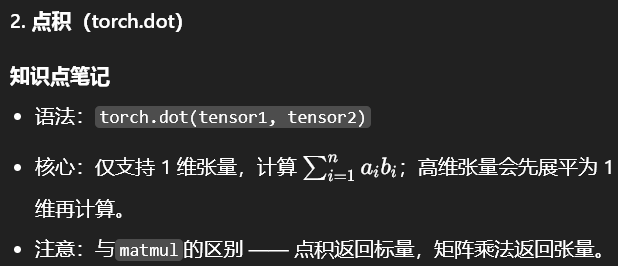

In [22]:
# 1维张量点积（基础）
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
dot_1d = torch.dot(x, y)  # 1×4 + 2×5 + 3×6 = 32
print("1维张量点积：", dot_1d)

# 高维张量点积（自动展平）
x_2d = torch.tensor([[1, 2], [3, 4]])
y_2d = torch.tensor([[5, 6], [7, 8]])
dot_2d = torch.dot(x_2d.flatten(), y_2d.flatten())
 # 1×5 + 2×6 + 3×7 + 4×8 = 70
print("2维张量展平点积：", dot_2d)

1维张量点积： tensor(32)
2维张量展平点积： tensor(70)


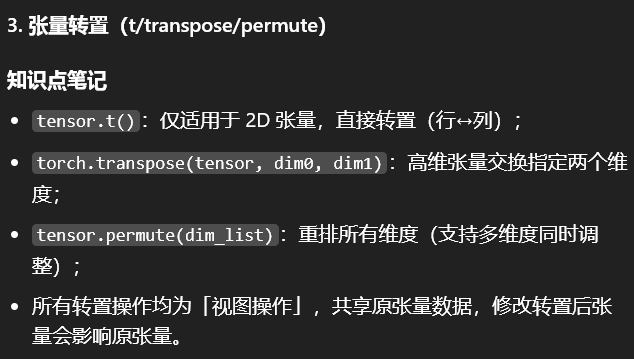

In [23]:
# 2D张量转置（t()）
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
A_t = A.t()  # 2×3 → 3×2
print("2D张量转置：\n", A_t)
print("转置后shape：", A_t.shape)

# 高维张量转置（transpose）
B = torch.randn(2, 3, 4)  # 2×3×4
B_trans = torch.transpose(B, 1, 2)  # 交换维度1和2 → 2×4×3
print("\n高维transpose后shape：", B_trans.shape)

# 多维度重排（permute）
C = torch.randn(2, 3, 4, 5)  # 2×3×4×5
C_perm = C.permute(3, 0, 2, 1)  # 维度顺序：3→0→2→1 → 5×2×4×3
print("permute后shape：", C_perm.shape)

2D张量转置：
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
转置后shape： torch.Size([3, 2])

高维transpose后shape： torch.Size([2, 4, 3])
permute后shape： torch.Size([5, 2, 4, 3])


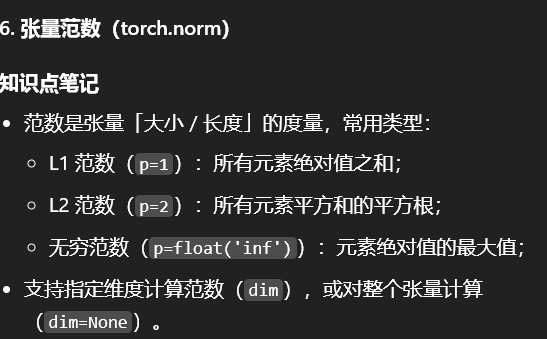

In [24]:
x = torch.tensor([[1, -2, 3], [-4, 5, -6]], dtype=torch.float32)

# 整个张量的L2范数（默认）
norm_L2 = torch.norm(x)
print("全局L2范数：", norm_L2)

# 按行计算L1范数（dim=1）
norm_L1_row = torch.norm(x, p=1, dim=1)
print("按行L1范数：", norm_L1_row)

# 按列计算无穷范数（dim=0）
norm_inf_col = torch.norm(x, p=float('inf'), dim=0)
print("按列无穷范数：", norm_inf_col)

全局L2范数： tensor(9.5394)
按行L1范数： tensor([ 6., 15.])
按列无穷范数： tensor([4., 5., 6.])


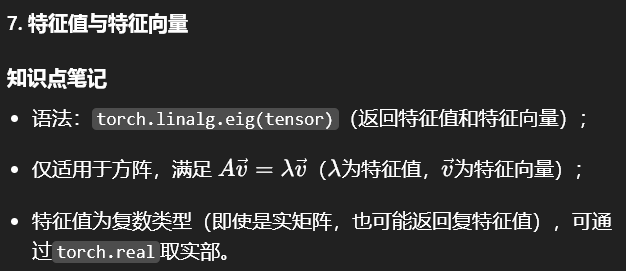

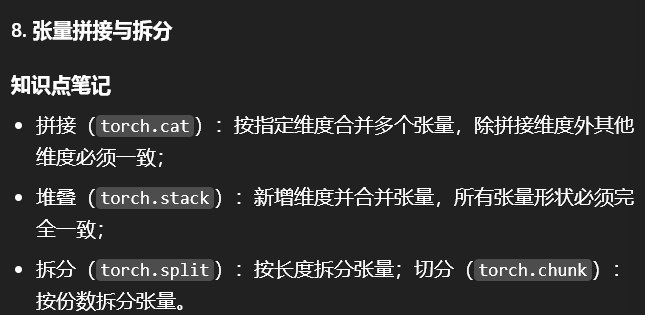

In [27]:
# 按列拼接（dim=1）
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])
cat_col = torch.cat([A, B], dim=1)  # 2×2 → 2×4
print("按列拼接：\n", cat_col)

# 堆叠（新增维度dim=0）
stack_0 = torch.stack([A, B], dim=0)  # 2×2 → 2×2×2
print("\n堆叠后shape：", stack_0.shape)

# 按长度拆分（split）
C = torch.arange(10).reshape(5, 2)
split_C = torch.split(C, split_size_or_sections=[2, 3], dim=0)  # 拆分为2行、3行
print("\n拆分结果：")
for part in split_C:
    print(part, part.shape)

# 按份数切分（chunk）
chunk_C = torch.chunk(C, chunks=2, dim=0)  # 5行拆分为2份（3行+2行）
print("\n切分结果：")
for part in chunk_C:
    print(part.shape)

按列拼接：
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

堆叠后shape： torch.Size([2, 2, 2])

拆分结果：
tensor([[0, 1],
        [2, 3]]) torch.Size([2, 2])
tensor([[4, 5],
        [6, 7],
        [8, 9]]) torch.Size([3, 2])

切分结果：
torch.Size([3, 2])
torch.Size([2, 2])
